# Necessary imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from data import Data
from ml_model import DNN, RNN

# predict bitcoin price

### start training for 2 epochs
Epoch 1/2
1407/1407 [==============================] - 28s 19ms/step - loss: 0.0236 - mae: 0.0236 - mse: 0.0081 - r_square: 0.9928 - val_loss: 0.0106 - val_mae: 0.0106 - val_mse: 2.1676e-04 - val_r_square: 0.9309
Epoch 2/2
1407/1407 [==============================] - 23s 16ms/step - loss: 0.0068 - mae: 0.0068 - mse: 1.1799e-04 - r_square: 0.9999 - val_loss: 0.0075 - val_mae: 0.0075 - val_mse: 1.1810e-04 - val_r_square: 0.9665
### training finish 



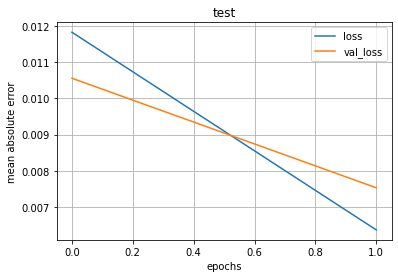

Out of sample performance:
1407/1407 - 3s - loss: 0.0075 - mae: 0.0075 - mse: 1.1810e-04 - r_square: 0.6905


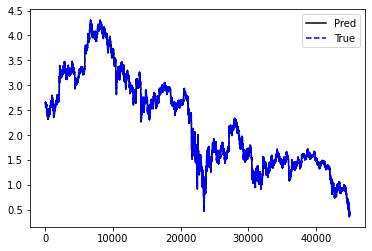

In [2]:
data = Data()
data.load_crypto(10)
model=RNN()

model.create_model(data,architecture=[64])
model.train_model(data,verbose=1,epoch=2)
model.show_performance(label_='test',data=data)
pred=model.model(data.X_te)


plt.plot(pred.numpy().flatten(),color='k',label='Pred')
plt.plot(data.y_te.flatten(),color='blue',linestyle='--',label='True')
plt.legend()
plt.show()

# My god we can predict crypto prices with 65% r², we are geniuses!

In [3]:
print(model.hist_training)



       loss       mae       mse  r_square  val_loss   val_mae   val_mse  \
0  0.011832  0.011832  0.001398  0.998740  0.010560  0.010560  0.000217   
1  0.006366  0.006366  0.000100  0.999906  0.007531  0.007531  0.000118   

   val_r_square  
0      0.930918  
1      0.966513  


# Except.... predicting price is easy (and useless). What about returns?

In [4]:
df = pd.DataFrame({'pred':pred.numpy().flatten(),'y':data.y_te.flatten()})
for c in df.columns:
    df[c+'_l'] = df[c].shift(1)
    df[c+'_ret'] = np.log(df[c]/df[c+'_l'])

print(1-((df['y_ret']-df['pred_ret'])**2).sum()/((df['y_ret'])**2).sum())

-0.5912042667060611
